### Import Libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### Load data to pandas dataframe

In [2]:
loan_data= pd.read_csv('loan\loan.csv')

In [3]:
# Checking if header exists
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Check if there are any footer rows

In [4]:
#checking if footer exists
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#Check the size of the data
loan_data.shape

(39717, 111)

In [6]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [7]:
# Segregating the values as Consumer and Loan for better understanding
consumer_variables= ['emp_length', 'home_ownership', 'annual_inc', 'addr_state',
                     'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
                     'mths_since_last_delinq','open_acc', 'pub_rec',
                     'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d', 
                     'pub_rec_bankruptcies']
loan_variables= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt']

In [8]:
# Choose important variables to perform operations on data
imp_variables= ['emp_length','home_ownership','annual_inc','addr_state','dti', 'pub_rec', 'total_acc',
                'pub_rec_bankruptcies','loan_amnt','funded_amnt','funded_amnt_inv','term',
                'int_rate','grade', 'sub_grade','verification_status', 'issue_d', 
                'loan_status', 'purpose']

In [9]:
sel_data= loan_data[imp_variables]
sel_data.head()

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,verification_status,issue_d,loan_status,purpose
0,10+ years,RENT,24000.0,AZ,27.65,0,9,0.0,5000,5000,4975.0,36 months,10.65%,B,B2,Verified,Dec-11,Fully Paid,credit_card
1,< 1 year,RENT,30000.0,GA,1.00,0,4,0.0,2500,2500,2500.0,60 months,15.27%,C,C4,Source Verified,Dec-11,Charged Off,car
2,10+ years,RENT,12252.0,IL,8.72,0,10,0.0,2400,2400,2400.0,36 months,15.96%,C,C5,Not Verified,Dec-11,Fully Paid,small_business
3,10+ years,RENT,49200.0,CA,20.00,0,37,0.0,10000,10000,10000.0,36 months,13.49%,C,C1,Source Verified,Dec-11,Fully Paid,other
4,1 year,RENT,80000.0,OR,17.94,0,38,0.0,3000,3000,3000.0,60 months,12.69%,B,B5,Source Verified,Dec-11,Current,other


In [12]:
sel_data.shape

(39717, 19)

In [14]:
sel_data.shape

(39717, 19)

### Convert columns types to particular format

In [15]:
#remove % from int_rate and convert the column to float 
sel_data['int_rate']= sel_data['int_rate'].apply(lambda x: x.replace('%', ''))
sel_data['int_rate']= sel_data['int_rate'].astype(float)

In [16]:
#remove unnecessary text and convert term column type to int
sel_data['term'] = sel_data['term'].apply(lambda x: x.replace(' months',''))
sel_data['term'] = sel_data['term'].astype(int)

In [17]:
# extracting numeric values from emp_length
sel_data['emp_length']= sel_data[~sel_data.loc[:,'emp_length'].isna()]['emp_length'] \
.apply(lambda x: x.replace('< 1 year', '0')) \
.apply(lambda x: int(re.search(r'\d+', x).group()))

In [18]:
# split issued month column into individual month and year columns and convert them into proper datetime format.
import datetime
sel_data['month']= sel_data['issue_d'].apply(lambda x: datetime.datetime.strptime(x.split('-')[0], '%b').month)
sel_data['year']= sel_data['issue_d'].apply(lambda x: '20'+x.split('-')[1], '%b')

In [19]:
# Convert year column to int
sel_data['year'] = sel_data['year'].astype(int)

In [20]:
sel_data.drop('issue_d',  axis='columns', inplace=True)

In [21]:
# Verify data in modified columns
sel_data[['emp_length','term','int_rate','month','year']]

,emp_length,term,int_rate,month,year
0,10.0,36,10.65,12,2011
1,0.0,60,15.27,12,2011
2,10.0,36,15.96,12,2011
3,10.0,36,13.49,12,2011
4,1.0,60,12.69,12,2011
...,...,...,...,...,...
39712,4.0,36,8.07,7,2007
39713,3.0,36,10.28,7,2007
39714,0.0,36,8.07,7,2007
39715,0.0,36,7.43,7,2007


### Data Imputation for columns having null values

In [10]:
#Check percentage of null values in each column
round((sel_data.isna().sum()/len(sel_data.index))*100,2)

emp_length              2.71
home_ownership          0.00
annual_inc              0.00
addr_state              0.00
dti                     0.00
pub_rec                 0.00
total_acc               0.00
pub_rec_bankruptcies    1.75
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
grade                   0.00
sub_grade               0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
dtype: float64

In [11]:
#drop empty columns
sel_data.dropna(how='all', axis=1, inplace=True)

In [13]:
#drop empty rows
sel_data.dropna(how='all', axis=0, inplace=True)

In [22]:
# Checking for the columns that has null values
sel_data.isna().sum()

emp_length              1075
home_ownership             0
annual_inc                 0
addr_state                 0
dti                        0
pub_rec                    0
total_acc                  0
pub_rec_bankruptcies     697
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
verification_status        0
loan_status                0
purpose                    0
month                      0
year                       0
dtype: int64

In [23]:
# Fetch data that has emp_length as null into seperate dataframe
null_emp_length= sel_data[sel_data['emp_length'].isnull()]

In [24]:
# Checking 75th percentile of loan amout and annual inc stats for the data that has emp_length is null
null_emp_length[['loan_amnt','annual_inc']].describe()

# from below data, it is observed 75th percentile who emp_length is null has (laon_amnt < 11000) and (annual_inc < 57575)

,loan_amnt,annual_inc
count,1075.000000,1075.000000
mean,8625.139535,45986.791553
std,6767.270992,37595.957342
min,1000.000000,4200.000000
25%,4000.000000,25000.000000
50%,6500.000000,38400.000000
75%,11000.000000,57575.000000
max,35000.000000,648000.000000


In [25]:
null_emp_length[['purpose']].value_counts(normalize=True)

# from below data 50% of the people whose emp_length is null has purpose "debt_consolidation" or "other"

purpose           
debt_consolidation    0.371163
other                 0.148837
credit_card           0.120930
home_improvement      0.090233
major_purchase        0.066977
car                   0.048372
small_business        0.041860
vacation              0.026977
medical               0.023256
moving                0.022326
house                 0.012093
wedding               0.012093
educational           0.007442
renewable_energy      0.007442
dtype: float64

In [26]:
# Checking above criteria with actual data, i.e. (laon_amnt < 11000) and (annual_inc < 57575) and (purpose "debt_consolidation" or "other")
sel_data.query('(annual_inc < 57575) and (loan_amnt < 11000) and (emp_length.notnull() \
               and ((purpose == "debt_consolidation") or (purpose == "other")))' \
              )['emp_length'].value_counts(normalize=True)

# From below data, it is evident that top 70% of the people emp_length lies between 0 & 5 years

0.0     0.155163
2.0     0.147332
10.0    0.134192
3.0     0.116007
1.0     0.103132
4.0     0.092514
5.0     0.089328
6.0     0.058004
7.0     0.043403
8.0     0.034245
9.0     0.026679
Name: emp_length, dtype: float64

In [27]:
# fillinf null values of emp_length with random values that lies between 0 and 5 years
import random
sel_data['emp_length'] = sel_data['emp_length'].fillna(random.randint(0,5))
sel_data.isnull().sum()

emp_length                0
home_ownership            0
annual_inc                0
addr_state                0
dti                       0
pub_rec                   0
total_acc                 0
pub_rec_bankruptcies    697
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
verification_status       0
loan_status               0
purpose                   0
month                     0
year                      0
dtype: int64

In [28]:
# check if datatype of emp_length is int
sel_data.emp_length.dtypes

dtype('float64')

In [29]:
#convert emp_length from float64 to int32
sel_data['emp_length']= sel_data['emp_length'].astype(int)

In [30]:
# Verify if the emp_length is converted to int32
sel_data.dtypes

emp_length                int32
home_ownership           object
annual_inc              float64
addr_state               object
dti                     float64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
grade                    object
sub_grade                object
verification_status      object
loan_status              object
purpose                  object
month                     int64
year                      int32
dtype: object

In [31]:
# Check frequency of values for pub_rec_bankruptcies
sel_data['pub_rec_bankruptcies'].value_counts(normalize= True)

0.0    0.956920
1.0    0.042901
2.0    0.000179
Name: pub_rec_bankruptcies, dtype: float64

In [32]:
# As 95% of the values has 0, fill the null values with mode (i.e 0)
sel_data['pub_rec_bankruptcies']= sel_data['pub_rec_bankruptcies'].fillna(sel_data['pub_rec_bankruptcies'].mode()[0])

In [33]:
# Convert pub_rec_bankruptcies from float64 to int32
sel_data['pub_rec_bankruptcies']= sel_data['pub_rec_bankruptcies'].astype(int)

In [34]:
# Verify if pub_rec_bankruptcies is converted to int32
sel_data.dtypes

emp_length                int32
home_ownership           object
annual_inc              float64
addr_state               object
dti                     float64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies      int32
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
grade                    object
sub_grade                object
verification_status      object
loan_status              object
purpose                  object
month                     int64
year                      int32
dtype: object

In [35]:
# verify if any null values exists in the data frame
sel_data.isnull().sum()

emp_length              0
home_ownership          0
annual_inc              0
addr_state              0
dti                     0
pub_rec                 0
total_acc               0
pub_rec_bankruptcies    0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
grade                   0
sub_grade               0
verification_status     0
loan_status             0
purpose                 0
month                   0
year                    0
dtype: int64

### Sanity checks

In [36]:
#employee length should be between 0 and 10
sel_data.emp_length.describe()

count    39717.000000
mean         4.947101
std          3.517584
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [37]:
#month should have values between 1 and 12
sel_data.month.describe()

count    39717.000000
mean         7.172168
std          3.396910
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [38]:
# Filter the data with loan_status: Fully Paid and Charged Off
#sel_data= sel_data.query('loan_status isin ["Fully Paid", "Charged Off"]')
sel_data= sel_data.loc[sel_data['loan_status'].isin(["Fully Paid", "Charged Off"])]
sel_data

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
0,10,RENT,24000.0,AZ,27.65,0,9,0,5000,5000,4975.0,36,10.65,B,B2,Verified,Fully Paid,credit_card,12,2011
1,0,RENT,30000.0,GA,1.00,0,4,0,2500,2500,2500.0,60,15.27,C,C4,Source Verified,Charged Off,car,12,2011
2,10,RENT,12252.0,IL,8.72,0,10,0,2400,2400,2400.0,36,15.96,C,C5,Not Verified,Fully Paid,small_business,12,2011
3,10,RENT,49200.0,CA,20.00,0,37,0,10000,10000,10000.0,36,13.49,C,C1,Source Verified,Fully Paid,other,12,2011
5,3,RENT,36000.0,AZ,11.20,0,12,0,5000,5000,5000.0,36,7.90,A,A4,Source Verified,Fully Paid,wedding,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,4,MORTGAGE,110000.0,CO,11.33,0,40,0,2500,2500,1075.0,36,8.07,A,A4,Not Verified,Fully Paid,home_improvement,7,2007
39713,3,RENT,18000.0,NC,6.40,0,9,0,8500,8500,875.0,36,10.28,C,C1,Not Verified,Fully Paid,credit_card,7,2007
39714,0,MORTGAGE,100000.0,MA,2.30,0,20,0,5000,5000,1325.0,36,8.07,A,A4,Not Verified,Fully Paid,debt_consolidation,7,2007
39715,0,MORTGAGE,200000.0,MD,3.72,0,26,0,5000,5000,650.0,36,7.43,A,A2,Not Verified,Fully Paid,other,7,2007


### Identifying Outliers and fixing them

In [39]:
# Defining variable type for above selected variables
cont_var = ['annual_inc','dti', 'loan_amnt','int_rate']
cat_var= ['term','emp_length','pub_rec','pub_rec_bankruptcies','month','year', 'home_ownership','grade','sub_grade','verification_status','loan_status','purpose']
Ord_cat_Var= ['term','emp_length','pub_rec','pub_rec_bankruptcies','month','year']
Unord_cat_var= ['home_ownership','addr_state','grade','sub_grade','verification_status','loan_status','purpose']

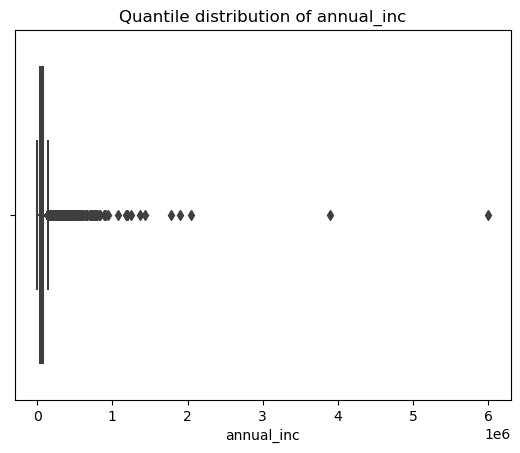

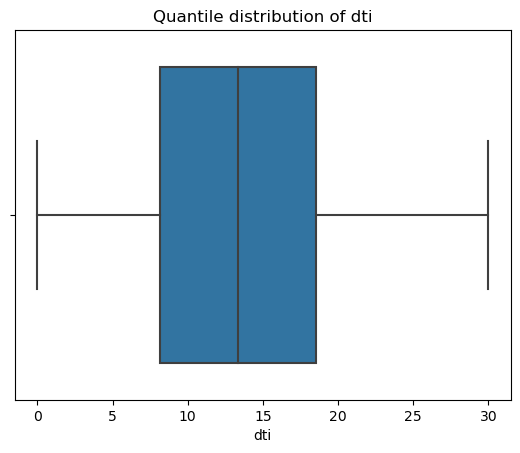

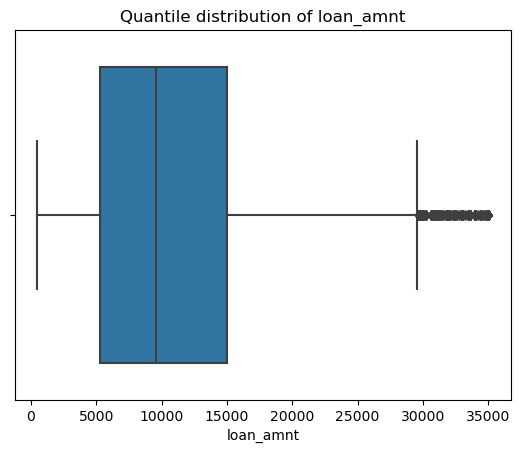

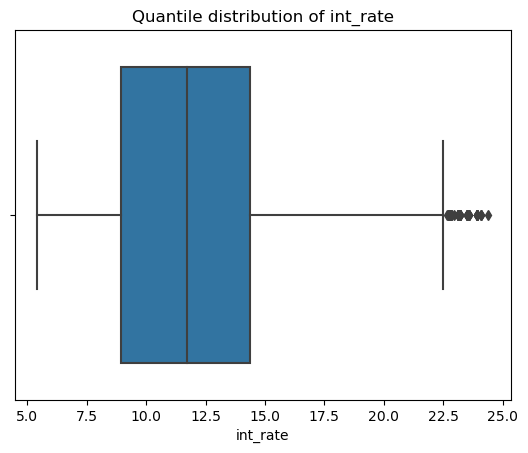

In [40]:
for i in cont_var:
    sns.boxplot(sel_data[i])
    plt.title('Quantile distribution of ' +i)
    plt.xlabel(i)
    plt.show()

In [41]:
# Analyzing outliers data of annual_inc
sel_data.query('annual_inc > 1000000 and loan_amnt < 10000')

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
23551,5,MORTGAGE,1900000.0,TX,0.57,0,36,0,1500,1500,1500.0,36,6.17,A,A3,Source Verified,Fully Paid,credit_card,11,2010
27564,10,MORTGAGE,1176000.0,MD,1.22,0,25,0,5600,5600,5600.0,60,13.61,C,C2,Source Verified,Fully Paid,other,7,2010
28906,8,MORTGAGE,1080000.0,MD,0.57,0,20,0,4500,4500,4500.0,60,7.88,A,A5,Source Verified,Fully Paid,major_purchase,6,2010
30107,10,MORTGAGE,6000000.0,CA,0.01,0,10,0,5000,5000,5000.0,36,12.73,C,C1,Source Verified,Fully Paid,home_improvement,5,2010
33982,7,MORTGAGE,1440000.0,CA,0.00,0,38,0,6400,6400,6300.0,36,7.40,A,A2,Not Verified,Fully Paid,major_purchase,11,2009
34304,9,MORTGAGE,1362000.0,CO,0.62,0,36,0,6600,6600,6600.0,36,7.74,A,A3,Not Verified,Fully Paid,debt_consolidation,11,2009
39089,0,RENT,2039784.0,FL,0.13,0,11,0,8450,8450,3747.0,36,12.29,C,C5,Not Verified,Fully Paid,debt_consolidation,3,2008


In [42]:
# It looks like outliers are identified with annual_inc greater than 1,000,000 and loan_amount < 10000
# Removing above outliers from the selected data frame
sel_data = sel_data[~((sel_data['annual_inc'] > 1000000) & (sel_data['loan_amnt'] < 10000))]
sel_data.shape

(38570, 20)

<AxesSubplot:xlabel='annual_inc'>

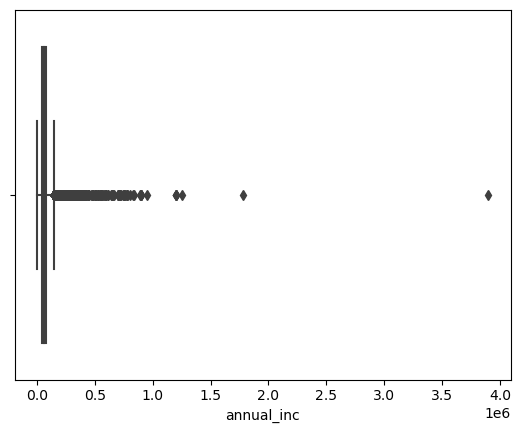

In [43]:
# Checking for further outliers
sns.boxplot(sel_data['annual_inc'])

In [44]:
# 2 more outliers are identified and analyzing the data
sel_data.query('annual_inc > 1500000')

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
7247,10,RENT,1782000.0,NY,1.31,0,30,0,12025,12025,12000.00000,36,14.27,C,C2,Not Verified,Fully Paid,debt_consolidation,9,2011
29639,3,MORTGAGE,3900000.0,NM,0.20,0,32,0,25000,15500,11430.00082,60,10.62,B,B3,Not Verified,Fully Paid,home_improvement,6,2010


In [45]:
# size of the data before removing outliers
sel_data.shape

(38570, 20)

In [46]:
# removing extra outliers
sel_data = sel_data.query('annual_inc < 1500000')
sel_data.shape

(38568, 20)

<AxesSubplot:xlabel='annual_inc'>

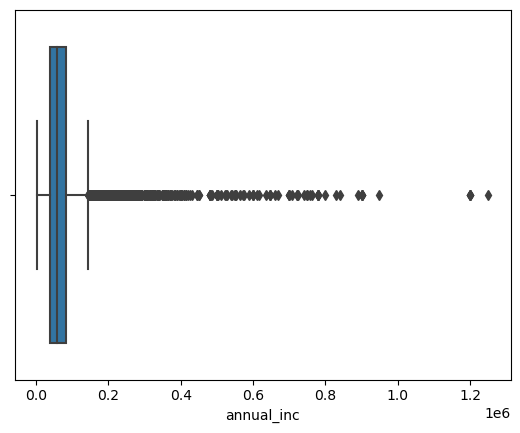

In [47]:
# Checking for further outliers
sns.boxplot(sel_data['annual_inc'])

### Univariate Analysis

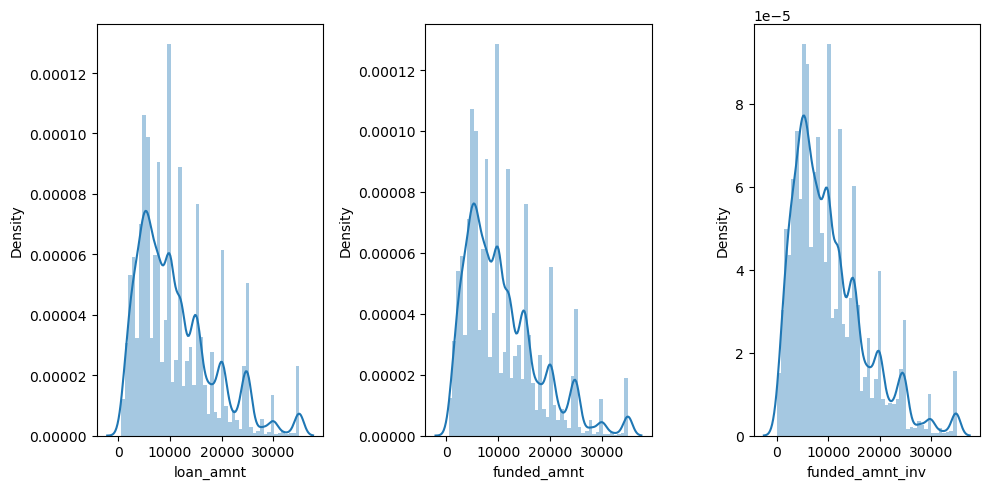

In [48]:
# checking the distribution of loan_amnt
plt.figure(figsize=[10,5])

plt.subplot(1, 3, 1) # row 1, col 2 index 1
sns.distplot(sel_data['loan_amnt'])

plt.subplot(1, 3, 2) # row 1, col 2 index 1
sns.distplot(sel_data['funded_amnt'])

plt.subplot(1, 3, 3) # row 1, col 2 index 1
sns.distplot(sel_data['funded_amnt_inv'])

plt.tight_layout()
plt.show()


In [49]:
# Distribution of the above variables are same, we consider only loan_amnt
# Removed 'funded_amnt','funded_amnt_inv' from imp variables list and reassigned.
imp_variables= ['emp_length','home_ownership','annual_inc','addr_state','dti', 'pub_rec', 'total_acc',
                'pub_rec_bankruptcies','loan_amnt','term',
                'int_rate','grade', 'sub_grade','verification_status', 
                'loan_status', 'purpose', 'month', 'year'].copy()
sel_data= sel_data[imp_variables]
sel_data

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
0,10,RENT,24000.0,AZ,27.65,0,9,0,5000,36,10.65,B,B2,Verified,Fully Paid,credit_card,12,2011
1,0,RENT,30000.0,GA,1.00,0,4,0,2500,60,15.27,C,C4,Source Verified,Charged Off,car,12,2011
2,10,RENT,12252.0,IL,8.72,0,10,0,2400,36,15.96,C,C5,Not Verified,Fully Paid,small_business,12,2011
3,10,RENT,49200.0,CA,20.00,0,37,0,10000,36,13.49,C,C1,Source Verified,Fully Paid,other,12,2011
5,3,RENT,36000.0,AZ,11.20,0,12,0,5000,36,7.90,A,A4,Source Verified,Fully Paid,wedding,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,4,MORTGAGE,110000.0,CO,11.33,0,40,0,2500,36,8.07,A,A4,Not Verified,Fully Paid,home_improvement,7,2007
39713,3,RENT,18000.0,NC,6.40,0,9,0,8500,36,10.28,C,C1,Not Verified,Fully Paid,credit_card,7,2007
39714,0,MORTGAGE,100000.0,MA,2.30,0,20,0,5000,36,8.07,A,A4,Not Verified,Fully Paid,debt_consolidation,7,2007
39715,0,MORTGAGE,200000.0,MD,3.72,0,26,0,5000,36,7.43,A,A2,Not Verified,Fully Paid,other,7,2007


In [50]:
# Defining variable type for above selected variables
Cont_var = ['annual_inc','dti','total_acc','loan_amnt','int_rate']
Ord_cat_Var= ['term','emp_length','pub_rec','pub_rec_bankruptcies','month','year']
Unord_cat_var= ['home_ownership','grade','sub_grade','verification_status','loan_status','addr_state','purpose']


In [51]:
sel_data_paid= sel_data.query(' loan_status == "Fully Paid"')
sel_data_default= sel_data.query(' loan_status == "Charged Off"')

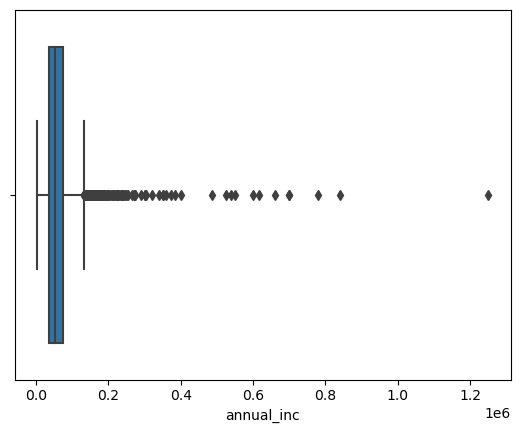

In [52]:
sns.boxplot(sel_data_default['annual_inc'])
plt.show()

In [53]:
# Removing outliers in defaulters data
sel_data_default= sel_data_default.query('annual_inc < 700000')
sel_data_default

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
1,0,RENT,30000.0,GA,1.00,0,4,0,2500,60,15.27,C,C4,Source Verified,Charged Off,car,12,2011
8,4,OWN,40000.0,CA,5.55,0,13,0,5600,60,21.28,F,F2,Source Verified,Charged Off,small_business,12,2011
9,0,RENT,15000.0,TX,18.08,0,3,0,5375,60,12.69,B,B5,Verified,Charged Off,other,12,2011
12,0,RENT,30000.0,VA,10.08,0,9,0,9000,36,13.49,C,C1,Source Verified,Charged Off,debt_consolidation,12,2011
14,3,RENT,100000.0,CA,7.06,0,29,0,10000,36,10.65,B,B2,Source Verified,Charged Off,other,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,0,MORTGAGE,32000.0,NE,20.00,0,32,0,2500,36,12.80,D,D4,Not Verified,Charged Off,home_improvement,8,2007
39668,0,MORTGAGE,75000.0,NE,20.00,0,35,0,2500,36,9.64,B,B4,Not Verified,Charged Off,home_improvement,8,2007
39669,9,MORTGAGE,213000.0,GA,6.45,0,28,0,6500,36,15.01,F,F1,Not Verified,Charged Off,small_business,8,2007
39678,2,MORTGAGE,33990.0,VA,14.47,0,11,0,1000,36,10.59,C,C2,Not Verified,Charged Off,wedding,8,2007


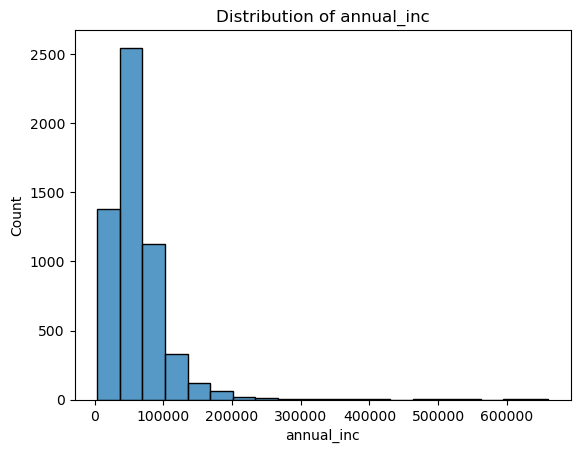

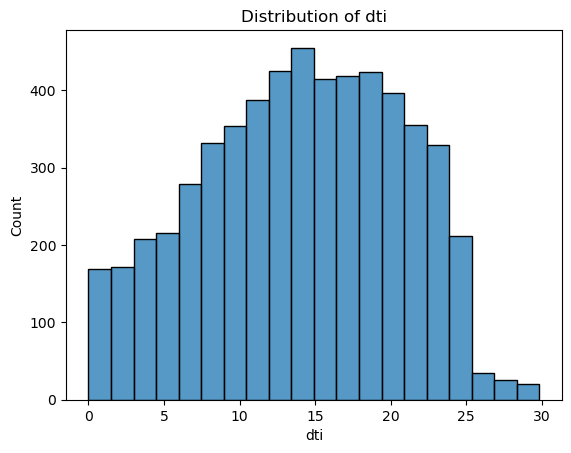

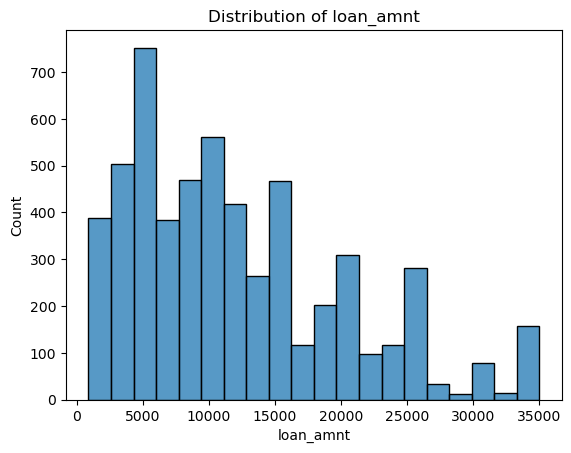

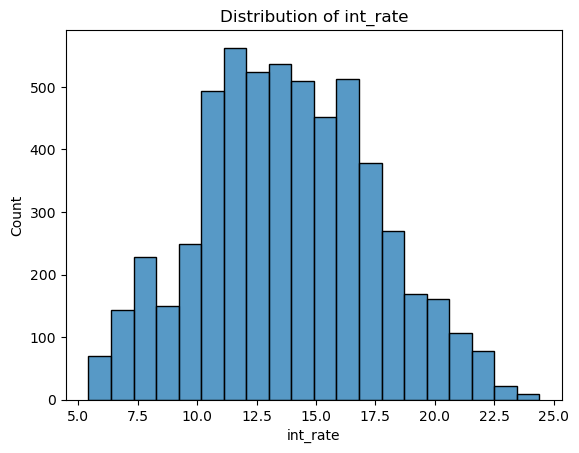

In [54]:
for i in cont_var:
    sns.histplot(sel_data_default[i], bins=20)
    plt.title('Distribution of ' +i)
    plt.xlabel(i)
    plt.show()

In [55]:
# for i in cat_var:
#     plt.figure(figsize=[8,5])
        
#     plt.subplot(1, 2, 1) # row 1, col 2 index 1
#     #sel_data[i].value_counts().plot.count()
#     sns.countplot(sel_data[i])
#     plt.title('Bar distribution of ' +i)
#     plt.xlabel(i)
#     plt.xticks(rotation=90)
    
#     plt.subplot(1, 2, 2)
#     plt.title('Pie distribution of ' +i)
#     sel_data[i].value_counts().plot.pie(autopct='%1.1f%%')
    
#     plt.tight_layout()
#     plt.show()
#     print('\n\n\n')
    

### Bivariate analysis

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

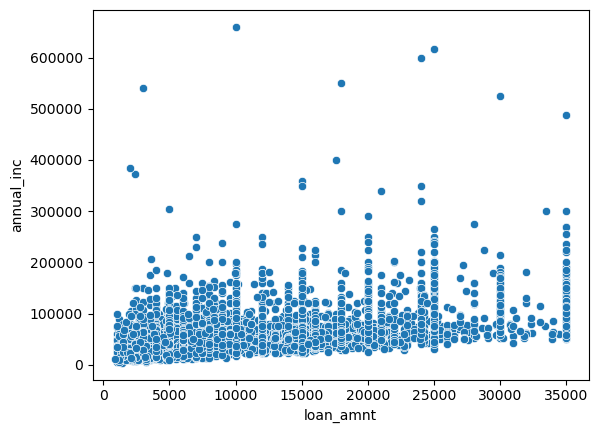

In [84]:
sns.scatterplot(data=sel_data_default, x='loan_amnt', y='annual_inc')

<AxesSubplot:xlabel='loan_amnt', ylabel='annual_inc'>

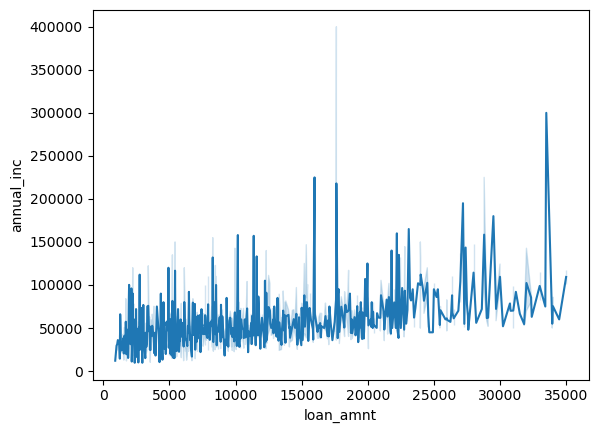

In [57]:
sns.lineplot(data=sel_data_default, x='loan_amnt', y='annual_inc', )

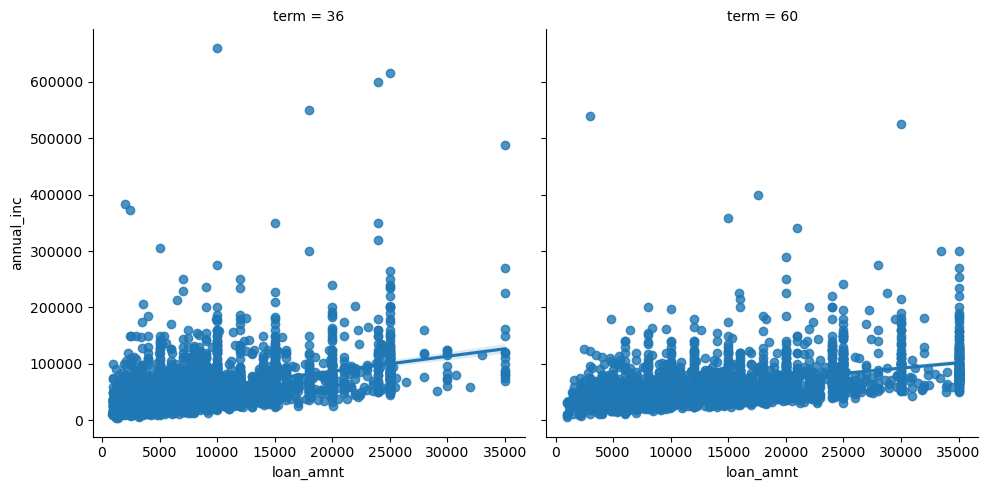

In [58]:
sns.lmplot(data=sel_data_default, x='loan_amnt', y='annual_inc', col="term" )

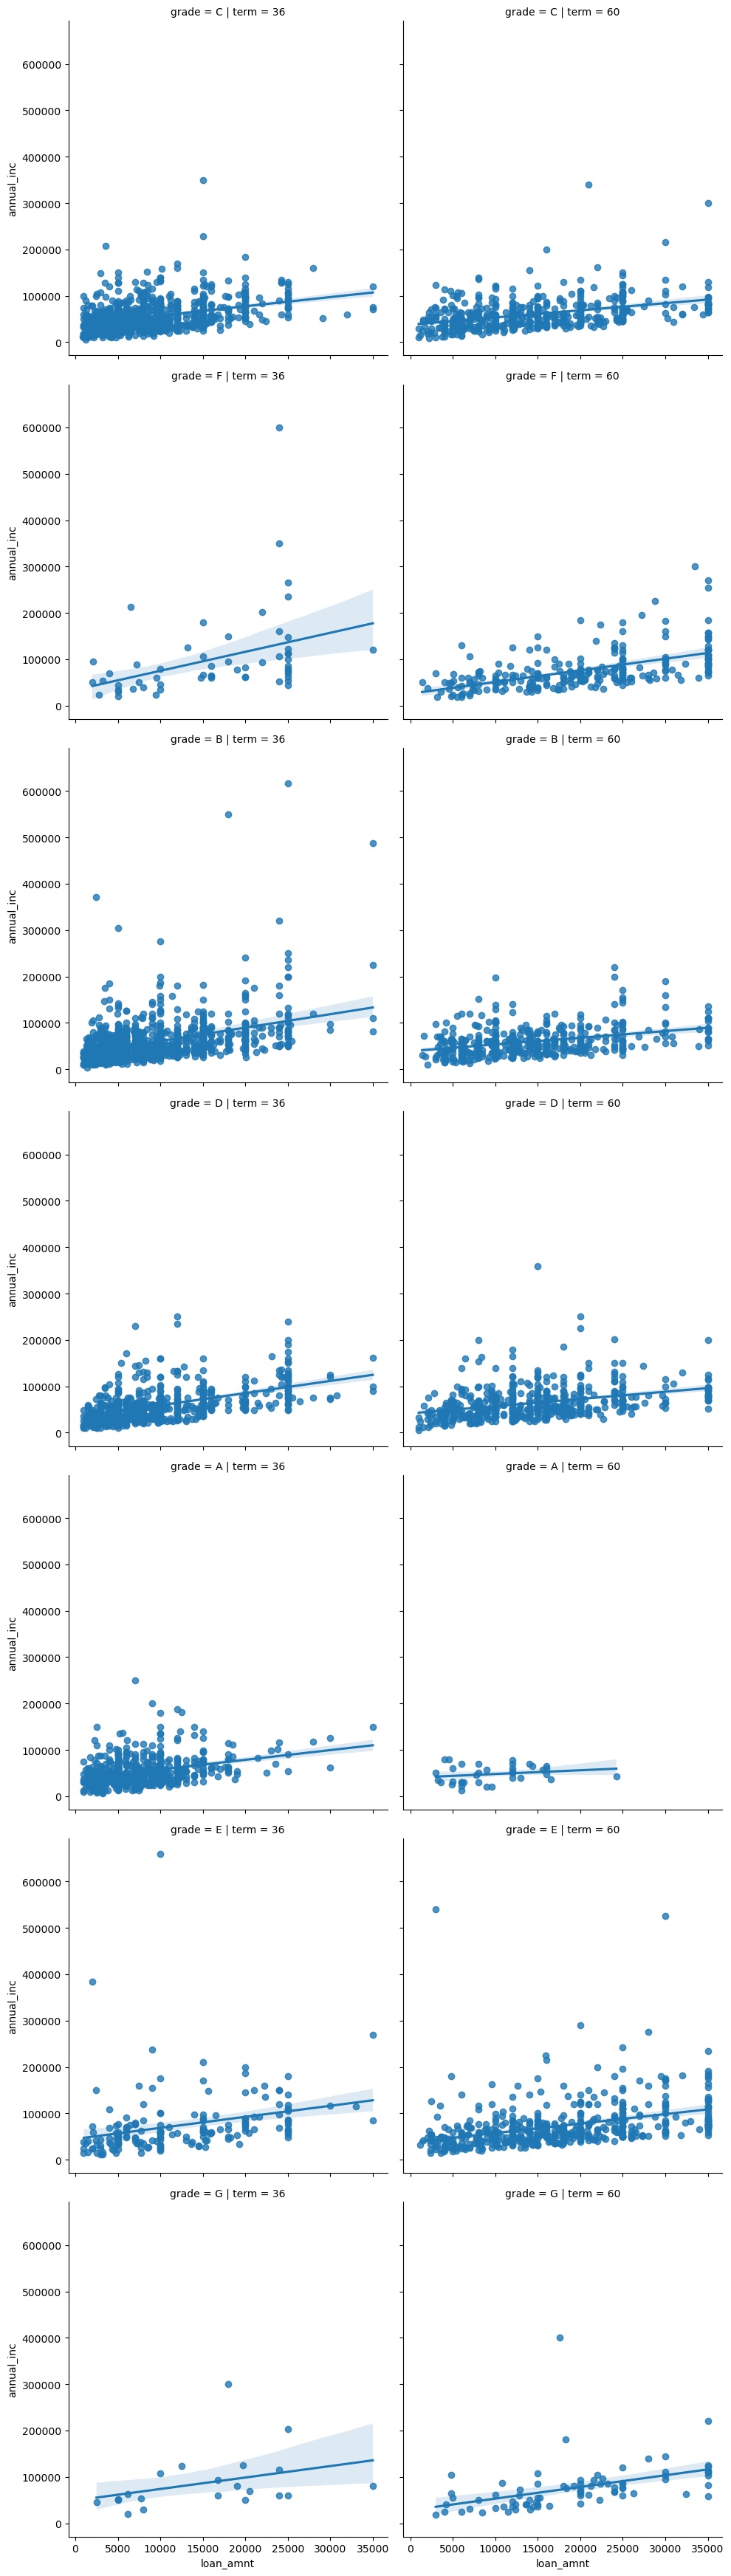

In [59]:
sns.lmplot(data=sel_data_default, x='loan_amnt', y='annual_inc', col="term", row='grade' )

## Derived Metrics

In [60]:
grade_pivot= sel_data.pivot_table(index='grade', columns='loan_status', aggfunc= 'count')['annual_inc']

In [61]:
grade_pivot['total_count'] = grade_pivot['Charged Off'] + grade_pivot['Fully Paid']

In [62]:
grade_pivot['percentage'] = grade_pivot['Charged Off'] / grade_pivot['total_count']

In [63]:
grade_pivot= grade_pivot.reset_index()

In [64]:
grade_pivot

loan_status,grade,Charged Off,Fully Paid,total_count,percentage
0,A,602,9439,10041,0.059954
1,B,1425,10249,11674,0.122066
2,C,1347,6483,7830,0.172031
3,D,1118,3967,5085,0.219862
4,E,715,1948,2663,0.268494
5,F,319,657,976,0.326844
6,G,101,198,299,0.337793


<AxesSubplot:xlabel='grade', ylabel='percentage'>

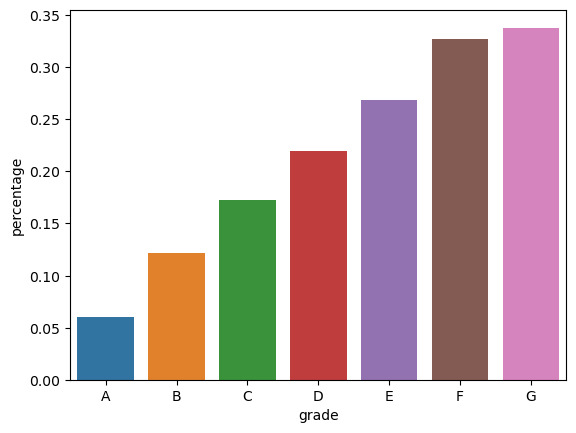

In [65]:
sns.barplot(data=grade_pivot, x='grade', y='percentage')

In [66]:
address_pivot= sel_data.pivot_table(index='addr_state', columns='loan_status', aggfunc='count')['annual_inc']

In [77]:
address_pivot= address_pivot.reset_index()
address_pivot

loan_status,index,addr_state,Charged Off,Fully Paid,total_count,percentage
0,0,AK,15.0,63.0,78.0,0.192308
1,1,AL,54.0,381.0,435.0,0.124138
2,2,AR,27.0,208.0,235.0,0.114894
3,3,AZ,123.0,726.0,849.0,0.144876
4,4,CA,1125.0,5822.0,6947.0,0.161940
5,5,CO,98.0,667.0,765.0,0.128105
6,6,CT,94.0,632.0,726.0,0.129477
7,7,DC,15.0,196.0,211.0,0.071090
8,8,DE,12.0,101.0,113.0,0.106195
9,9,FL,504.0,2276.0,2780.0,0.181295


In [68]:
address_pivot['total_count'] = address_pivot['Charged Off'] + address_pivot['Fully Paid']

In [69]:
address_pivot['percentage'] = address_pivot['Charged Off'] / address_pivot['total_count']

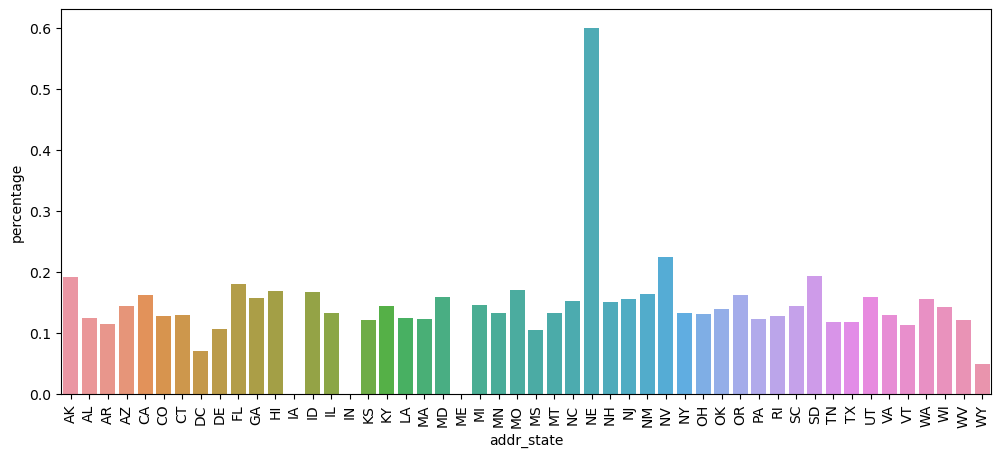

In [70]:
plt.figure(figsize=[12,5])
sns.barplot(data=address_pivot, x='addr_state', y='percentage')
plt.xticks(rotation=90)
plt.show()

In [71]:
bankruptcies_pivot= sel_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', aggfunc='count')['annual_inc']

In [72]:
bankruptcies_pivot

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0,5259,31667
1,366,1271
2,2,3


In [73]:
bankruptcies_pivot= bankruptcies_pivot.reset_index()
bankruptcies_pivot

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid
0,0,5259,31667
1,1,366,1271
2,2,2,3


In [79]:
bankruptcies_pivot['total_count'] = bankruptcies_pivot['Charged Off'] + bankruptcies_pivot['Fully Paid']
bankruptcies_pivot

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total_count
0,0,5259,31667,36926
1,1,366,1271,1637
2,2,2,3,5


In [80]:
bankruptcies_pivot['percentage'] = bankruptcies_pivot['Charged Off'] / bankruptcies_pivot['total_count']
bankruptcies_pivot

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total_count,percentage
0,0,5259,31667,36926,0.14242
1,1,366,1271,1637,0.22358
2,2,2,3,5,0.40000


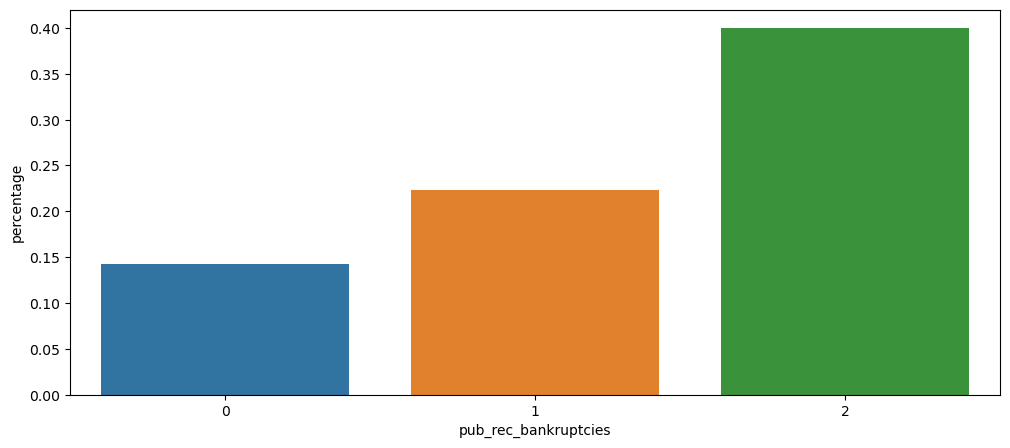

In [83]:
plt.figure(figsize=[12,5])
sns.barplot(data=bankruptcies_pivot, x='pub_rec_bankruptcies', y='percentage')
plt.show()

In [96]:
#loan amount vs interest rate
sel_data['loan_amnt_cat'] = pd.cut(x=sel_data['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000], \
                                   labels=['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000','25000-30000','30000-35000'])
sel_data
# labels=['1 to 20', '21 to 40', '41 to 60',
                           # '61 to 80', '81 to 100']

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year,loan_amnt_cat
0,10,RENT,24000.0,AZ,27.65,0,9,0,5000,36,10.65,B,B2,Verified,Fully Paid,credit_card,12,2011,0-5000
1,0,RENT,30000.0,GA,1.00,0,4,0,2500,60,15.27,C,C4,Source Verified,Charged Off,car,12,2011,0-5000
2,10,RENT,12252.0,IL,8.72,0,10,0,2400,36,15.96,C,C5,Not Verified,Fully Paid,small_business,12,2011,0-5000
3,10,RENT,49200.0,CA,20.00,0,37,0,10000,36,13.49,C,C1,Source Verified,Fully Paid,other,12,2011,5000-10000
5,3,RENT,36000.0,AZ,11.20,0,12,0,5000,36,7.90,A,A4,Source Verified,Fully Paid,wedding,12,2011,0-5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,4,MORTGAGE,110000.0,CO,11.33,0,40,0,2500,36,8.07,A,A4,Not Verified,Fully Paid,home_improvement,7,2007,0-5000
39713,3,RENT,18000.0,NC,6.40,0,9,0,8500,36,10.28,C,C1,Not Verified,Fully Paid,credit_card,7,2007,5000-10000
39714,0,MORTGAGE,100000.0,MA,2.30,0,20,0,5000,36,8.07,A,A4,Not Verified,Fully Paid,debt_consolidation,7,2007,0-5000
39715,0,MORTGAGE,200000.0,MD,3.72,0,26,0,5000,36,7.43,A,A2,Not Verified,Fully Paid,other,7,2007,0-5000


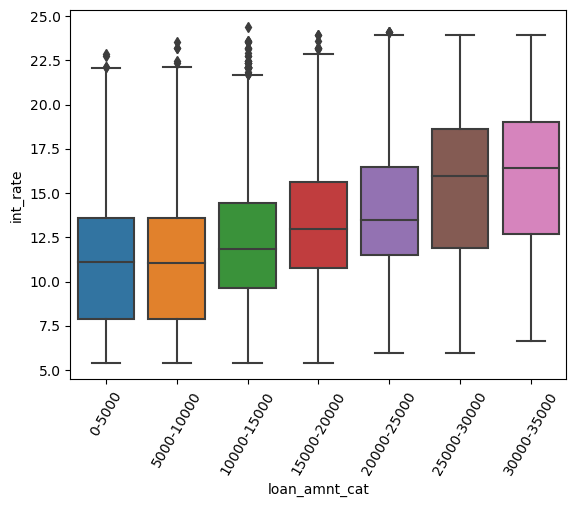

In [99]:
sns.boxplot(data=sel_data, x='loan_amnt_cat', y='int_rate')
plt.xticks(rotation=60)
plt.show()

In [88]:
sel_data

,emp_length,home_ownership,annual_inc,addr_state,dti,pub_rec,total_acc,pub_rec_bankruptcies,loan_amnt,term,int_rate,grade,sub_grade,verification_status,loan_status,purpose,month,year
0,10,RENT,24000.0,AZ,27.65,0,9,0,5000,36,10.65,B,B2,Verified,Fully Paid,credit_card,12,2011
1,0,RENT,30000.0,GA,1.00,0,4,0,2500,60,15.27,C,C4,Source Verified,Charged Off,car,12,2011
2,10,RENT,12252.0,IL,8.72,0,10,0,2400,36,15.96,C,C5,Not Verified,Fully Paid,small_business,12,2011
3,10,RENT,49200.0,CA,20.00,0,37,0,10000,36,13.49,C,C1,Source Verified,Fully Paid,other,12,2011
5,3,RENT,36000.0,AZ,11.20,0,12,0,5000,36,7.90,A,A4,Source Verified,Fully Paid,wedding,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,4,MORTGAGE,110000.0,CO,11.33,0,40,0,2500,36,8.07,A,A4,Not Verified,Fully Paid,home_improvement,7,2007
39713,3,RENT,18000.0,NC,6.40,0,9,0,8500,36,10.28,C,C1,Not Verified,Fully Paid,credit_card,7,2007
39714,0,MORTGAGE,100000.0,MA,2.30,0,20,0,5000,36,8.07,A,A4,Not Verified,Fully Paid,debt_consolidation,7,2007
39715,0,MORTGAGE,200000.0,MD,3.72,0,26,0,5000,36,7.43,A,A2,Not Verified,Fully Paid,other,7,2007


In [74]:
# cor= sel_data_default.corr()
# cor.style.background_gradient(cmap='coolwarm')

In [75]:
# cor= sel_data_paid.corr()
# cor.style.background_gradient(cmap='coolwarm')

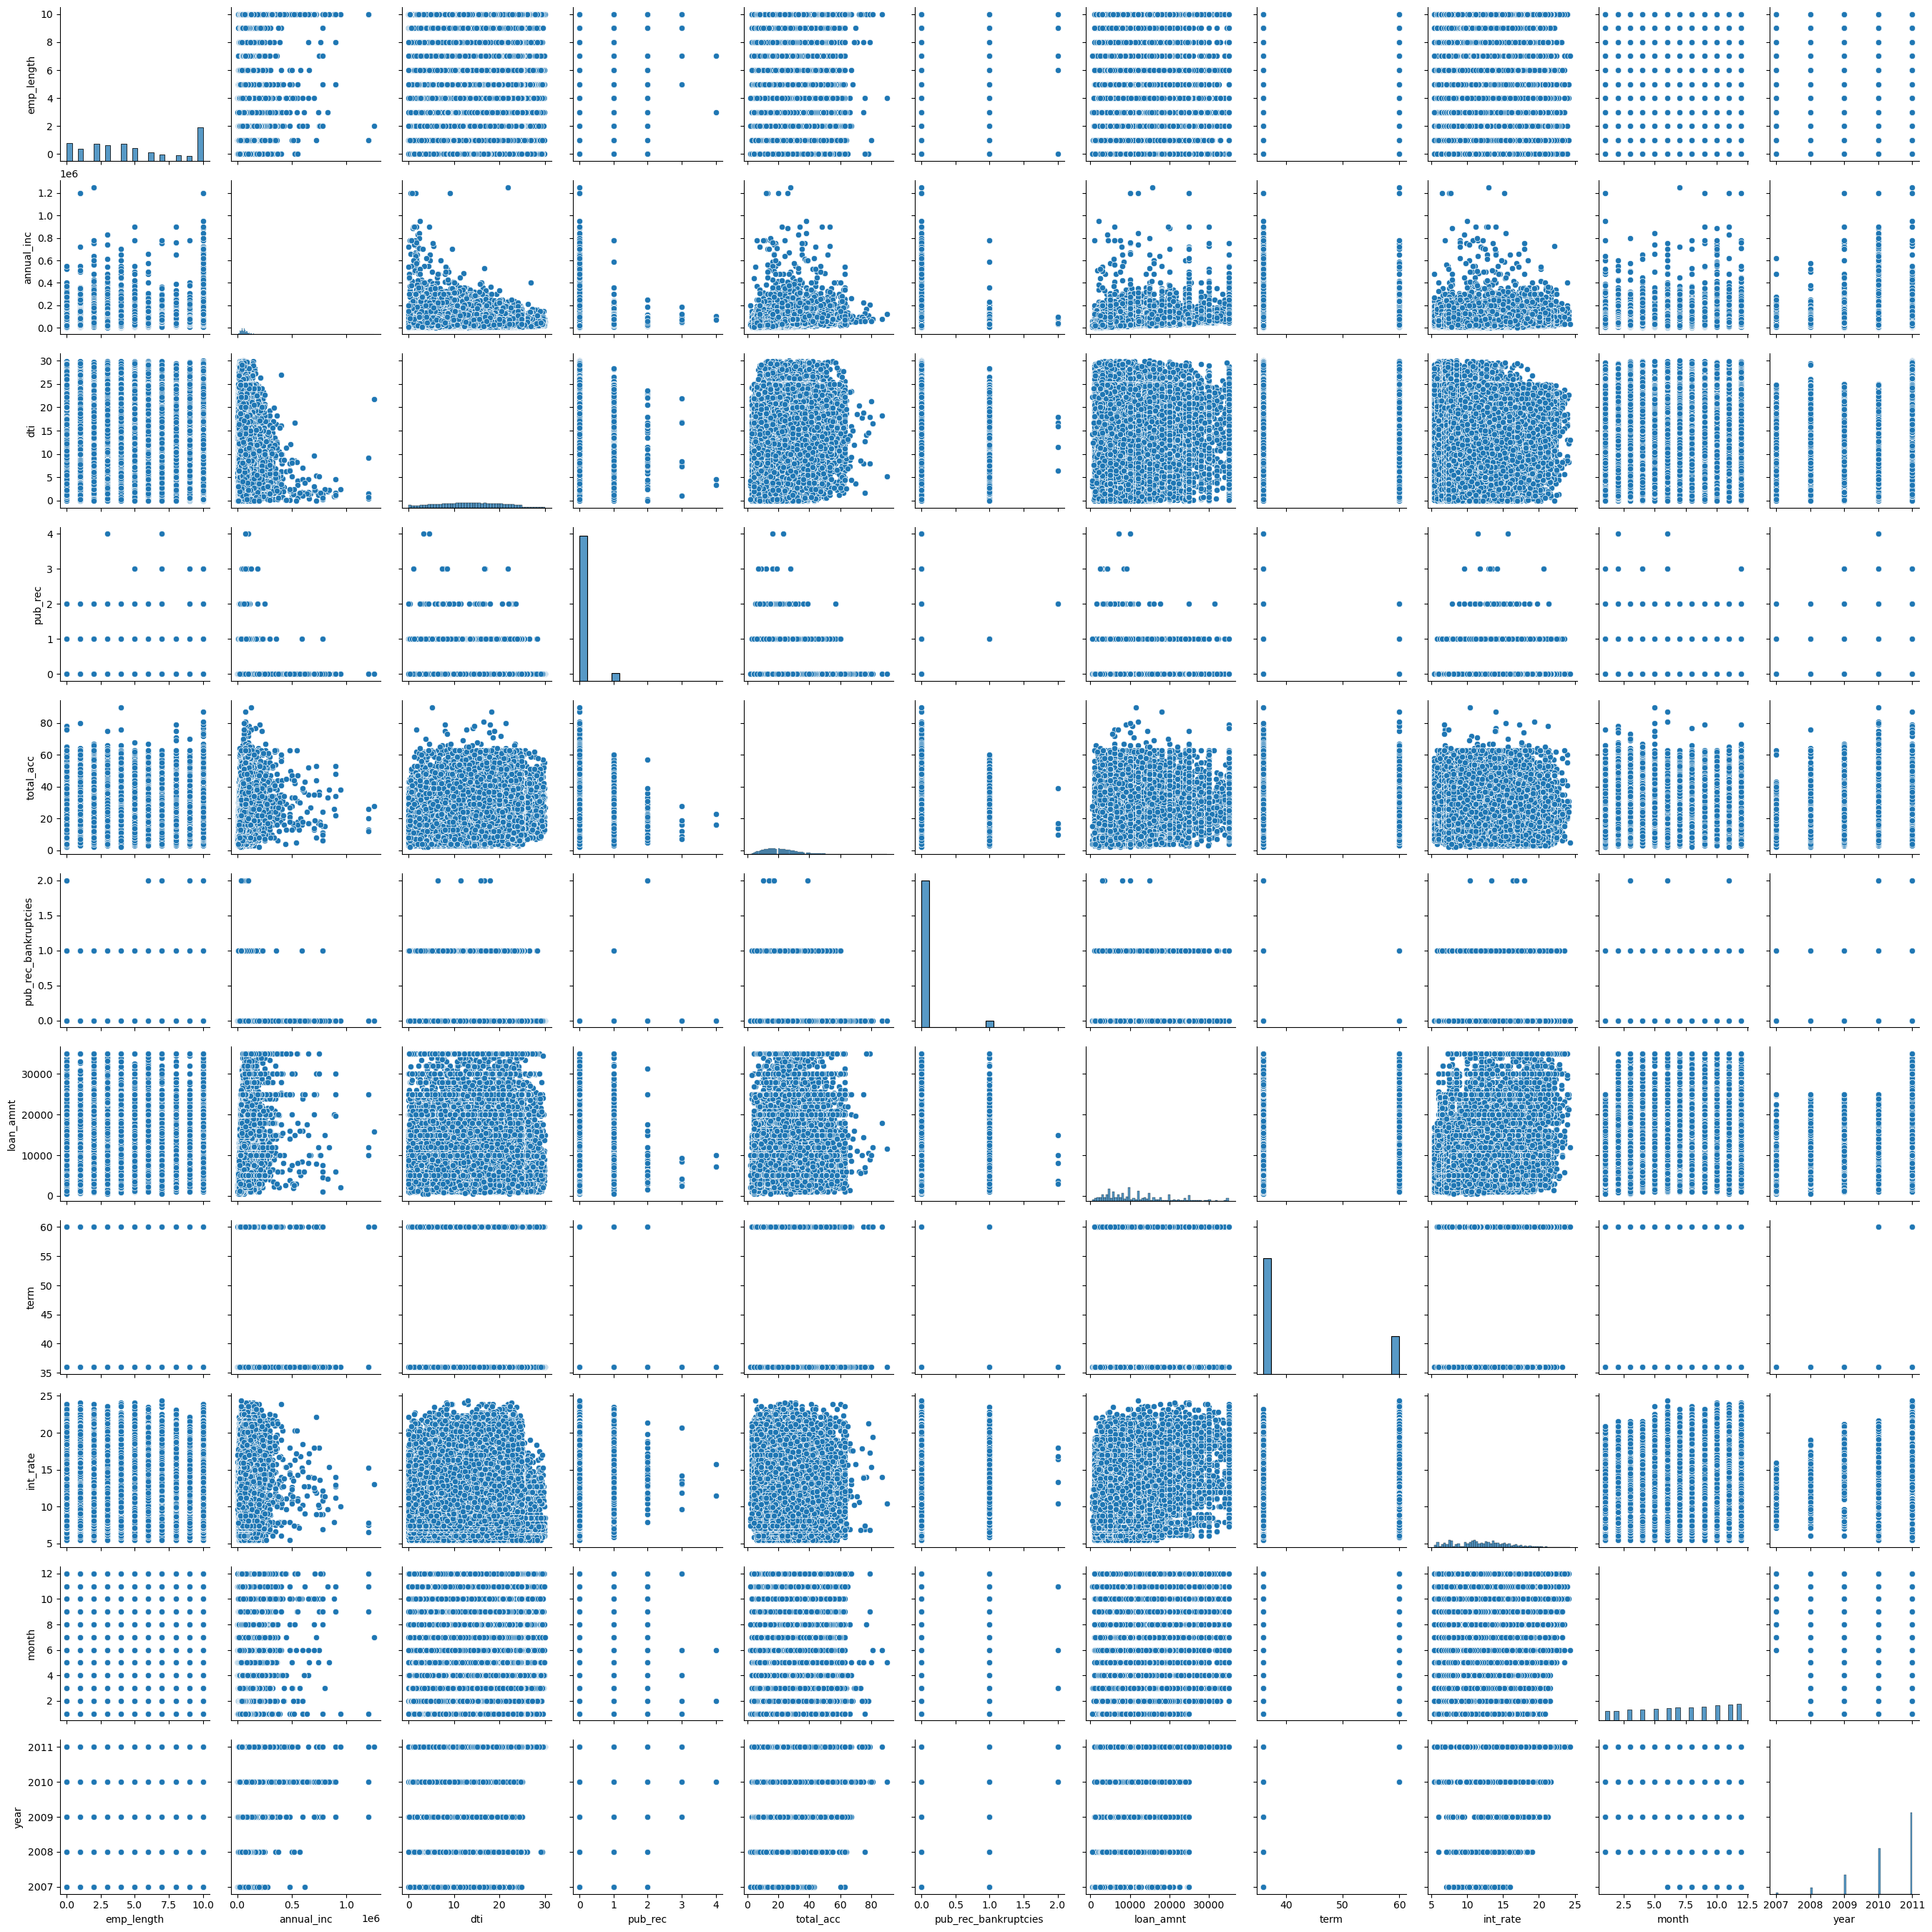

In [76]:
sns.pairplot(data=sel_data)